<a href="https://colab.research.google.com/github/raralra/data_set/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

워드 클라우드라이브러리 설치

In [65]:
#wordcloud 라이브러리
!pip install wordcloud

In [66]:
#라이브러리 불러오기
from wordcloud import wordcloud

In [67]:
from collections import Counter
#컨테이너에 동일한 값의 자료가 몇 개인지를 파악하는 데 사용하는 모듈 (빈도수계산)

[collections](https://docs.python.org/3/library/collections.html) 알아보기

In [68]:
import numpy as np #넘파이불러오기

In [69]:
from PIL import Image #이미지 처리

[PIL](https://pillow.readthedocs.io/en/stable/reference/Image.html)이미지모듈

PIL.Image.open(fp, mode='r', formats=None)
- fp - 파일 이름(문자열), os.PathLike 객체 또는 파일 객체입니다. 파일 객체는 , 및 메서드를 구현해야 하며 file.read바이너리 file.seek모드 file.tell로 열려야 합니다. 파일 객체는 읽기 전에 0을 찾습니다.

- 모드 - 모드입니다. 주어진 경우 이 인수는 "r"이어야 합니다.

- 형식 - 파일 로드를 시도할 형식의 목록 또는 튜플입니다. 이는 확인된 형식 집합을 제한하는 데 사용할 수 있습니다. None지원되는 모든 형식을 사용해 보려면 통과하세요 . 함수를 실행 하거나 사용하여 사용 가능한 형식 세트를 인쇄할 수 있습니다 .

In [70]:
import matplotlib.pyplot as plt #이미지 표시

In [71]:
import re #정규 표현식

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
littlePrince = open('/content/drive/MyDrive/Colab Notebooks/미래채움 파이썬/어린 왕자.txt', 'r', encoding='utf-8').read()
littlePrince

'   \n   어린 왕자\n   영어동화 \n   생텍쥐페리\n   \n   \n   헌사\n   레옹 베르트에게\n   \n   먼저 이 글을 어린이들이 아닌 어른들에게 바치는 것에 대해 사과할까 한다. 심심한 사과의 말을 전한다. 하지만 이들 어른들은 세상에서 가장 좋은 친구다. 물론 이 발언에 대해서도 심심한 사과의 말을 전하는 바이다. 이들 어른들은 모든 걸 이해할 수 있다, 심지어 어린이들의 책까지. 이런 세 번째로 사과의 말을 전하는 바이다. 이들 어른들은 프랑스에만 해도 굶 주림과 추위에 살고 있다. 그에겐 아늑함이 필요한 것도 사실이다. 내 사과들이 충분하든 아니든, 난 이 책을 어른이 된 어린이들에게 바치는 바이다. 모든 어른도 출발은 아이들이었다. 하지만 그들 몇몇만 그걸 기억해낼 뿐이다. 그래 내 헌사(받 치는 글)를 다음과 같이 수정할까 한다.\n   어린이였을 때의\n   레옹 베르트에게\n   \n  \n  \n   어린 왕자 \n   1장\n   내가 여섯 살 때 한 번은 원시림을 다룬 『생명체 이야기』라는 책에서 굉장한 그림 하나를 본 적이 있는데. 그건 야수를 한 입 에 삼킨 보아 뱀에 관한 얘기였어. 여기 이 그림이 그거 야.\n   \n   \n   \n   \n   황갈색 보아 뱀\n   \n   책엔 이렇게 쓰여 있더라고, 보아 뱀은 씹지도 않고 산 채로 먹이를 삼킨데. 그런 다음엔 소화를 위해 여섯 달 동안 꿈쩍 도 않고 잠만 잔데.\n   난 정말 이 얘기를 듣고 정글의 모험에 관한 많은 생각들이 들더라, 이어 색연필로 내 첫 번째 그림을 그려보게 시작했지. 바로 이게 그거 야.\n   \n   \n   솜브레로 챙이 넓은 멕시코 모자\n   \n   난 이 걸작을 어른들께 보여드리며 내 그림이 무섭지 않냐고 물어보았지. 그들이 말하데. 뭐가 무섭다는 거니?\n   내 그림은 그냥 모자 아니냐는 거야. 아니라고, 코끼리를 소화시키고 있던 보아 뱀이라고. 그래서 보아 뱀 안에도 그렸더니 그제야 어른들은 이해하지 뭐야. 

단어분리, 불용어 리스트 만들기, 불용어 제거, 단어빈도 계산

In [74]:
#단어분리 및 소문자 변환(한국어는 변환필요없음)
littlePrince_word = re.findall(r'\w+', littlePrince)
print(littlePrince_word)
print(len(littlePrince_word)) #갯수

#findall()은 문자열 안에 패턴에 맞는 케이스를 전부 찾아서 리스트로 반환합니다.

['어린', '왕자', '영어동화', '생텍쥐페리', '헌사', '레옹', '베르트에게', '먼저', '이', '글을', '어린이들이', '아닌', '어른들에게', '바치는', '것에', '대해', '사과할까', '한다', '심심한', '사과의', '말을', '전한다', '하지만', '이들', '어른들은', '세상에서', '가장', '좋은', '친구다', '물론', '이', '발언에', '대해서도', '심심한', '사과의', '말을', '전하는', '바이다', '이들', '어른들은', '모든', '걸', '이해할', '수', '있다', '심지어', '어린이들의', '책까지', '이런', '세', '번째로', '사과의', '말을', '전하는', '바이다', '이들', '어른들은', '프랑스에만', '해도', '굶', '주림과', '추위에', '살고', '있다', '그에겐', '아늑함이', '필요한', '것도', '사실이다', '내', '사과들이', '충분하든', '아니든', '난', '이', '책을', '어른이', '된', '어린이들에게', '바치는', '바이다', '모든', '어른도', '출발은', '아이들이었다', '하지만', '그들', '몇몇만', '그걸', '기억해낼', '뿐이다', '그래', '내', '헌사', '받', '치는', '글', '를', '다음과', '같이', '수정할까', '한다', '어린이였을', '때의', '레옹', '베르트에게', '어린', '왕자', '1장', '내가', '여섯', '살', '때', '한', '번은', '원시림을', '다룬', '생명체', '이야기', '라는', '책에서', '굉장한', '그림', '하나를', '본', '적이', '있는데', '그건', '야수를', '한', '입', '에', '삼킨', '보아', '뱀에', '관한', '얘기였어', '여기', '이', '그림이', '그거', '야', '황갈색', '보아', '뱀', '책엔', '이렇게', '쓰여', '있더라고', '보아', '뱀은', '씹지도', '않고'

In [117]:
#불용어 리스트(한국어 예시, 여기서는 매우 기본적인 불용어만 사용)
stopwords = set(['이','및','에','의','것으로',
                 '있는','등이','를','은','는',
                 '가','도','와','에게','에서','이야',
                 '게','!','을','것에','그','세','떼'])  #해당하는 글자들을 모아서 stopwords에 저장
print(stopwords,len(stopwords)) #불용어 갯수

{'이', '에서', '가', '와', '및', '를', '세', '도', '이야', '에', '을', '의', '!', '등이', '에게', '는', '떼', '은', '것에', '그', '있는', '게', '것으로'} 23


In [118]:
#불용어 제거 및 단어 빈도 계산

littlePrince_word = [word for word in littlePrince_word if word not in stopwords]
#텍스트가 불용어가 아니라면 littlePrince_word에 저장

littlePrince_word_counts= Counter(littlePrince_word)
#정제된 글자들 빈도수별로 저장

print(littlePrince_word)
print(len(littlePrince_word))
print(littlePrince_word_counts)

['어린', '왕자', '영어동화', '생텍쥐페리', '헌사', '레옹', '베르트에게', '먼저', '글을', '어린이들이', '아닌', '어른들에게', '바치는', '대해', '사과할까', '한다', '심심한', '사과의', '말을', '전한다', '하지만', '이들', '어른들은', '세상에서', '가장', '좋은', '친구다', '물론', '발언에', '대해서도', '심심한', '사과의', '말을', '전하는', '바이다', '이들', '어른들은', '모든', '걸', '이해할', '수', '있다', '심지어', '어린이들의', '책까지', '이런', '번째로', '사과의', '말을', '전하는', '바이다', '이들', '어른들은', '프랑스에만', '해도', '굶', '주림과', '추위에', '살고', '있다', '그에겐', '아늑함이', '필요한', '것도', '사실이다', '내', '사과들이', '충분하든', '아니든', '난', '책을', '어른이', '된', '어린이들에게', '바치는', '바이다', '모든', '어른도', '출발은', '아이들이었다', '하지만', '그들', '몇몇만', '그걸', '기억해낼', '뿐이다', '그래', '내', '헌사', '받', '치는', '글', '다음과', '같이', '수정할까', '한다', '어린이였을', '때의', '레옹', '베르트에게', '어린', '왕자', '1장', '내가', '여섯', '살', '때', '한', '번은', '원시림을', '다룬', '생명체', '이야기', '라는', '책에서', '굉장한', '그림', '하나를', '본', '적이', '있는데', '그건', '야수를', '한', '입', '삼킨', '보아', '뱀에', '관한', '얘기였어', '여기', '그림이', '그거', '야', '황갈색', '보아', '뱀', '책엔', '이렇게', '쓰여', '있더라고', '보아', '뱀은', '씹지도', '않고', '산', '채로', '먹이를', '삼킨데', '그런', '다음엔', '

In [119]:
#빈도수별 저장된 단어중 가장 많이 나타난 단어100개 출력
most_common_words = littlePrince_word_counts.most_common(100)

print(most_common_words)


[('어린', 296), ('라며', 203), ('말했다', 169), ('왕자가', 140), ('난', 120), ('하지만', 103), ('내', 96), ('수', 78), ('내가', 76), ('그럼', 62), ('왕자는', 62), ('한', 60), ('다시', 44), ('더', 36), ('애가', 36), ('그런', 35), ('네', 35), ('왕자', 34), ('걸', 34), ('다', 34), ('날', 33), ('이렇게', 32), ('내게', 32), ('있었다', 31), ('거야', 30), ('그래서', 28), ('너무', 28), ('말을', 27), ('건', 27), ('그건', 26), ('거예요', 26), ('제가', 25), ('두', 24), ('전', 24), ('넌', 24), ('자신의', 24), ('안', 23), ('제', 23), ('것이다', 23), ('어른들은', 22), ('좀', 22), ('왕이', 22), ('여우가', 22), ('정말', 21), ('그게', 21), ('말이다', 21), ('작은', 20), ('네가', 20), ('물론', 19), ('말이야', 19), ('또', 19), ('아니', 19), ('왕자의', 19), ('무슨', 19), ('없었다', 19), ('그래', 18), ('다른', 18), ('아주', 18), ('아', 18), ('않았다', 18), ('없는', 17), ('그러니', 17), ('꽃이', 17), ('말이', 17), ('키는', 17), ('된', 16), ('보아', 16), ('있어요', 16), ('잘', 16), ('있을', 16), ('별들을', 16), ('꽃은', 16), ('대답했다', 16), ('했다', 16), ('불', 16), ('것도', 15), ('거', 15), ('뱀이', 15), ('어느', 15), ('때문이다', 15), ('같은', 15), ('사람이', 15), ('꽃을'

In [120]:
# most_common_words를 딕셔너리로 변환
word_freq_dict = dict(most_common_words)


In [78]:
#별 또는 내가 만든 모양 이미지 읽어오기
image_path = '/content/drive/MyDrive/Colab Notebooks/미래채움 파이썬/star.png'
shape = np.array(Image.open(image_path)) #이미지를 배열로 변환


In [114]:
#폰트 경로 지정
font='/content/drive/MyDrive/Colab Notebooks/data/a시월구일굴림2.ttf'
#c드라이브의 폰트를 드라이브에 올려서 사용

**colormap**
- 'plasma'
- 'magma'
- 'inferno'
- 'cividis'
- 'cool'
- 'autumn'

In [138]:
from wordcloud import WordCloud
#워드클라우드 객체생성

wordcloud = WordCloud(
    font_path=font,
    background_color='white',  # 배경색 설정
    mask=shape,  # 워드클라우드 모양 설정
    #contour_width=1,  # 모양 주변의 너비 설정
    #contour_color='red',  # 모양 주변의 주변선 색상 설정
    colormap='autumn' ,  # 색상 맵 지정
    max_font_size=100,  # 최대글자크기
    min_font_size=10)  # 최소글자 크기설정


# generate_from_frequencies() 메서드에 딕셔너리 형식의 데이터 전달
wordcloud.generate_from_frequencies(word_freq_dict)

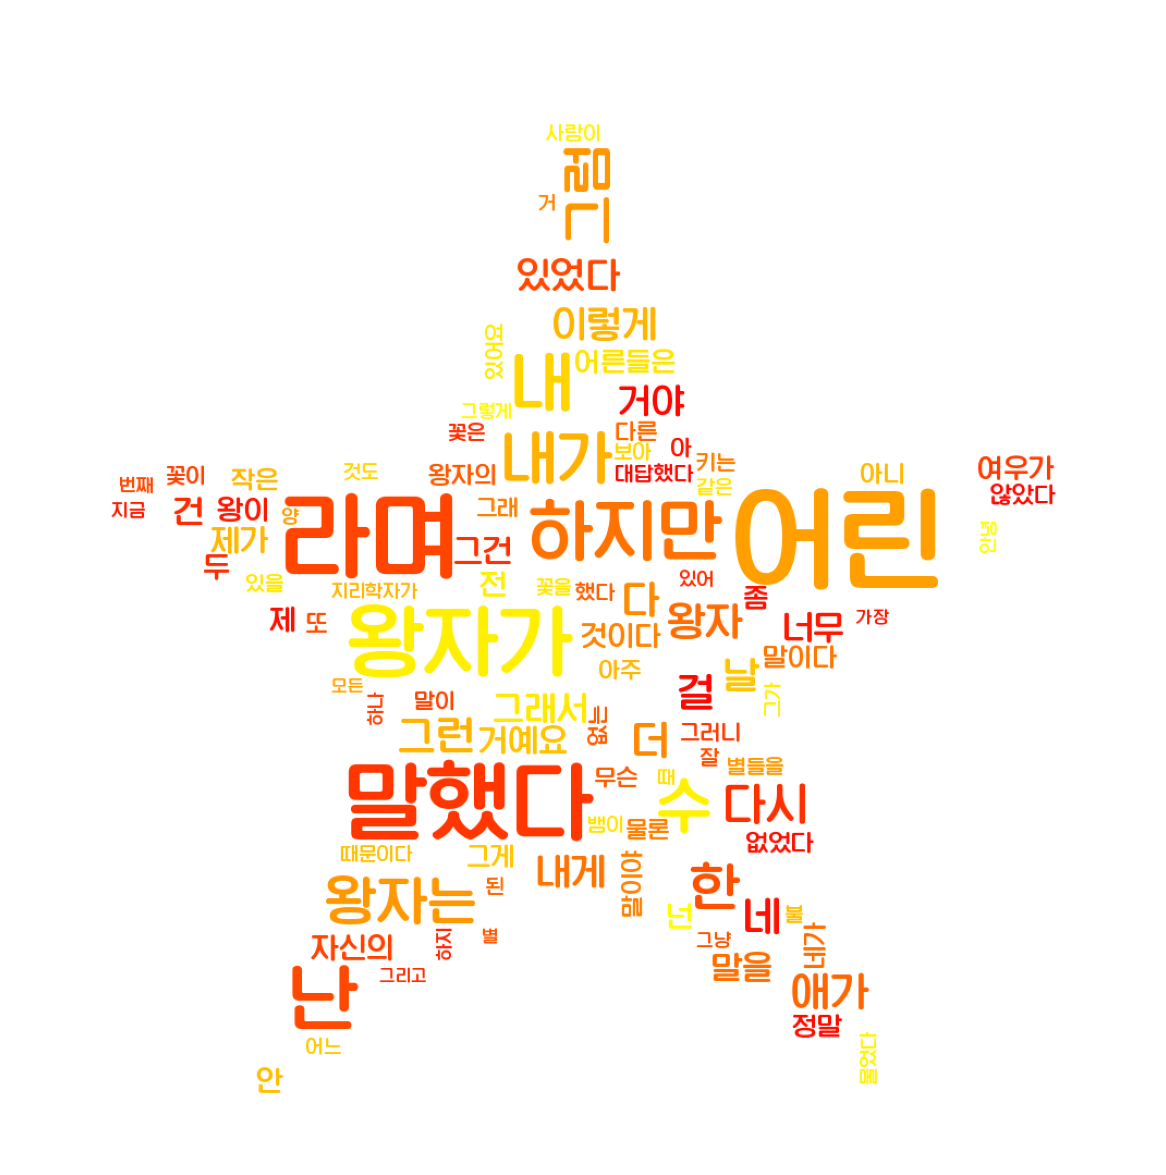

In [139]:
#워드클라우드 생성


plt.figure(figsize = (15,15)) # 새로운 시각화 창을 생성하고 그 크기를 설정
plt.imshow(wordcloud)
#이미지를 표시합니다. interpolation= bilinear'는 선형 보간 방법을 사용하여 부드러운 이미지를 생성
plt.axis('off') # 축을 비활성화
plt.show() # 생성된 시각화를 표시

In [ ]:
#이미지 저장
wordcloud.to_file('star2.png')